In [11]:
#Note: This is a visualized version of logistic regression lib.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#This is a implementation and library for binary classification, a.k.a logistic regression

In [13]:
#load iris dataset for debugging
from sklearn import datasets
dataset = datasets.load_breast_cancer()
#print(dataset)
#print(dataset['data'])    #input value of dataset
#print(dataset['target'])   #True label of iris datasets

In [14]:
''' 
In order to implement logistic regression, we need to initialize parameters w and b, note that when using logistic regression, 
we have only one computing unit in the neural network. Therefore parameters can be initialized to all zeros. 
However, if we are using multiple computing units(e.g. sigmoid or relu), it is required to initialize the parameter w randomly, while
b can be set to all zeros.
'''
def logistic_parameter_initialize(x_dim):
    # x_dim indicates the dimensions of input feature,a bias unit b is defaultly set.
    w = np.zeros((1,x_dim))
    b = 0
    
    parameter = {'w':w,'b':b}
    return parameter

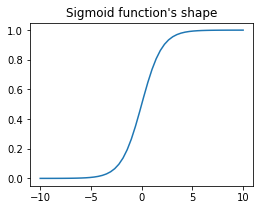

In [15]:
#implementation of sigmoid function
def sigmoid(z):
    value = 1/(1+np.exp(-z))
    return value

#plot Sigmoid function 
plt.figure(figsize=(4,3))
plt.title('Sigmoid function\'s shape')
z = np.linspace(-10,10)
plt.plot(z,sigmoid(z))

In [16]:
#note the dimensions of vectors:
# w - (1,x_dims)
# b - (1,x_dims) *broadcasted*
# X - (x_dims,m) *m=number of samples


# Forward propagation step: compute the predicted y's label
def forward_prop(w,b,X):
    z = np.dot(w,X)+b
    a = sigmoid(z)
    return z,a

# Compute cost function: used to check convergence
def compute_cost(a,y):
    m = a.shape[1]
    cost = -np.sum(y*np.log(a)+(1-y)*np.log(1-a))/m
    return cost

# Back propagation step: compute partial derivatives of each parameter respectively
def back_prop(X,a,y):
    m = a.shape[1]
    dz = a - y
    dw = np.dot(X,dz.T).T/m
    db= np.sum(dz)/m
    # Note: dw should have the same dimension as w have.Therefore back_prop return dw.T
    return dw,db

In [17]:
# The overall implementation of trainning a logistic regression
def train_logistic_regression(X,y,number_of_iteration = 1000,learning_rate = 0.03,print_cost = True,plot_cost = True):
    # Dimension convert: make sure all vectors are in proper shapes.
    y = y.reshape(1,-1)   # y is a row vector
    m = y.shape[1]  #  m = total number of trainning examples
    if(X.shape[1] != m):
        X=X.T       #=====> Note that array.reshape and array.T are different!
    x_dim = X.shape[0]
    # Initialize parameters
    params = logistic_parameter_initialize(x_dim)
    w = params['w']
    b = params['b']
    
    if(plot_cost == True):
        i_curve = []
        cost_curve = []
        plt.figure(figsize=(5,5))
        plt.title('Cross entrophy of regression')
    
    for i in range(1,number_of_iteration+1):
        z,a = forward_prop(w,b,X)
        dw,db = back_prop(X,a,y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        cost = compute_cost(a,y)
        # Visualize the process of regression
        if(i%100 == 0 and print_cost == True):
            print('number of iterations:{}, cost = {}'.format(i,cost))
        if(i%100 == 0 and plot_cost == True):
            i_curve.append(i)
            cost_curve.append(cost)
    if(plot_cost==True):        
        i_curve = np.reshape(i_curve,(1,-1))
        cost_curve = np.reshape(cost_curve,(1,-1))
        plt.scatter(i_curve,cost_curve)
    
    return w,b

In [18]:
#After training the unit, we can now use it to make predictions.
def logistic_predict(w,b,X,y=0,evaluate = True):
    if(not w.shape[1] == X.shape[0]):
        X = X.T
    yhat = np.dot(w,X)+b
    yhat = yhat>0.5
    #Codes below is used to evaluate the performance of logistic regression on given dataset X with label y
    #You can just ignore this part
    if(evaluate == True):
        y=y.reshape(1,-1)
        train_accuracy = np.sum(yhat==y)/y.shape[1]
        print('accuracy = %.2f\n'%train_accuracy)
    return yhat

In [19]:
print("Goal:Wanna classify whether our patient's breast cancer is {}(0) or {}(1)".format(dataset.target_names[0],dataset.target_names[1]))
y = dataset['target']
#Normalize input feature X
X = dataset['data']
X_norm = np.linalg.norm(X,axis=0,keepdims=True)
X = (X)/ (np.max(X)-np.min(X))
#Split up dataset in order to train as well as test the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

Goal:Wanna classify whether our patient's breast cancer is malignant(0) or benign(1)


Training accuracy:
accuracy = 0.92

Accuracy in test sets:
accuracy = 0.85

sklearn's logistic regression training accuracy:
0.87


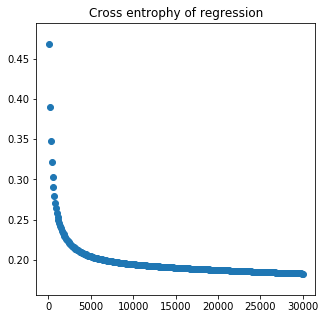

In [20]:
# Train the logistic unit
w,b = train_logistic_regression(X_train,y_train,number_of_iteration = 30000,learning_rate = 1,print_cost = False,plot_cost = True)

# Evaluate the performance of the unit on training set and test set
print('Training accuracy:')
Yhat = logistic_predict(w,b,X_train,y_train,evaluate = True)
print('Accuracy in test sets:')
Ypredict = logistic_predict(w,b,X_test,y_test,evaluate = True)

#Okay, we have built our own logistic regression unit. Let's compare our unit with sklearn's! 
model=LogisticRegression(solver='liblinear')#Build a logistic regression model
model=model.fit(X_train,y_train)#Train the model
train_score=model.score(X_train,y_train)#How many samples can the model predict right? 
print('sklearn\'s logistic regression training accuracy:')
print('%.2f'%train_score)